# Research Question 3. 
## Do movie viewers and game players follow the same user patterns? 
Are people more loyal to a game series or a movie series? Does that loyalty extend to both forms of media?


In [2]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("franchises_combined_by_year.csv", index_col = 0)

In [4]:
games_df = df[df["type"] == "game"]
movies_df = df[df["type"] == "movie"]

In [5]:
df.head(50)

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes
0,Mario,3025-1,game,tt0315808,Baseball,1978,0,NaN,"["" 'Baseball'"", ""['Sport'"", "" 'Family'"", "" 'Sp...",13.000000,3.000000,195.0,1.0,NaN,NaN,NaN,NaN,-3.808490,-0.253646
1,Mario,3025-1,game,tt0176664,Donkey Kong,1981,0,NaN,"[""['Action'"", "" 'Platformer']""]",2011.000000,7.400000,195.0,1.0,3.0,1998.000000,4.400000,0.0,0.278200,0.593586
2,Mario,3025-1,game,"tt0204287, tt3472820","Donkey Kong Junior, Donkey Kong",1982,0,NaN,"["" 'Family']"", "" 'Platformer'"", ""['Action'""]",170.500000,6.500000,195.0,2.0,1.0,-1840.500000,-0.900000,1.0,-0.557714,-0.186860
3,Mario,3025-1,game,"tt0176971, tt0185909, tt0302501, tt2318635, tt...","Mario Bros., Baseball, Donkey Kong, Pinball, M...",1983,0,NaN,"["" 'Platformer'"", ""['Sport'"", "" 'Baseball'"", ""...",326.800000,6.000000,195.0,5.0,1.0,156.300000,-0.500000,3.0,-1.022110,-0.120583
4,Mario,3025-1,game,"tt0185017, tt0186168, tt3404206, tt3410580","Wrecking Crew, Golf, Mario Bros. Special, Punc...",1984,0,NaN,"["" 'Platformer'"", ""['Puzzle'"", "" 'Action'"", "" ...",49.500000,5.850000,195.0,4.0,1.0,-277.300000,-0.150000,-1.0,-1.161429,-0.238169
5,Mario,3025-1,game,tt0177266,Super Mario Bros.,1985,0,NaN,"["" 'Pinball']"", "" 'Action'"", ""['Animation'"", ""...",6522.000000,8.900000,195.0,1.0,1.0,6472.500000,3.050000,-3.0,1.671390,2.506430
6,Mario,3025-1,game,"tt0204658, tt0302502, tt3417312, tt3422316, tt...","Super Mario Bros.: The Lost Levels, Donkey Kon...",1986,0,NaN,"["" 'Platformer'"", "" 'Pinball']"", ""['Adventure'...",232.571429,6.571429,195.0,7.0,1.0,-6289.428571,-2.328571,6.0,-0.491371,-0.160539
7,Mario,3025-1,game,"tt0204284, tt3425360","Yume Koujou: Doki Doki Panic, Famicom Grand Pr...",1987,0,NaN,"["" 'Platformer'"", ""['Adventure'"", "" 'Family']""...",23.000000,6.550000,195.0,2.0,1.0,-209.571429,-0.021429,-5.0,-0.511274,-0.249406
8,Mario,3025-1,game,"tt0204659, tt0249174, tt0302503, tt0311026, tt...","Super Mario Bros. 2, Super Mario Bros. 3, Donk...",1988,0,NaN,"["" 'Platformer'"", ""['Adventure'"", "" 'Family'"",...",1461.000000,6.533333,195.0,6.0,1.0,1438.000000,-0.016667,4.0,-0.526754,0.360364
9,Mario,3025-1,game,"tt0204660, tt1242591","Super Mario Land, Alleyway",1989,0,NaN,"["" 'Platformer'"", "" 'Family'"", ""['Adventure'"",...",629.000000,7.150000,195.0,2.0,1.0,-832.000000,0.616667,-4.0,0.046002,0.007562


### Analysis

1. Show little stats for both, like:
- average time between releases
- largest gap
- largest franchise length
- highest frequency
- average total content in franchise


- For any z-ratings under the 0 mark, do the z-votes also fall off?

In [6]:
games_df["year_diff"].describe()

count    6148.000000
mean        2.748373
std         3.316103
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        40.000000
Name: year_diff, dtype: float64

In [7]:
movies_df["year_diff"].describe()

count    3221.000000
mean        4.241540
std         7.022946
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        83.000000
Name: year_diff, dtype: float64

<AxesSubplot:ylabel='Frequency'>

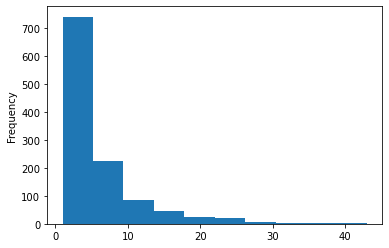

In [8]:
games_df["franchise_id"].value_counts().plot.hist()

<AxesSubplot:ylabel='Frequency'>

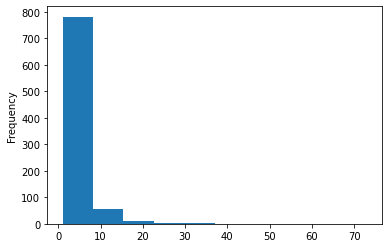

In [9]:
movies_df["franchise_id"].value_counts().plot.hist()

2. Mean rating for franchises and their respective number of votes\
measured across what?

In [10]:
# A custom function to calculate
# probability distribution function
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

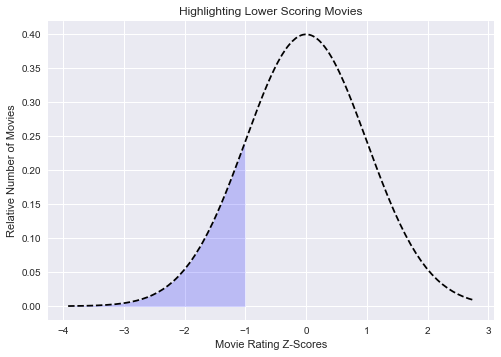

In [26]:
# To generate an array of x-values

x = np.sort(pd.Series(movies_df["z_rating"]).to_numpy())
# To generate an array of 
# y-values using corresponding x-values
y = pdf(x)
  
# To fill in values under the bell-curve
x_fill = np.sort(pd.Series(movies_df["z_rating"]).to_numpy())
y_fill = pdf(x_fill)


fig, ax = plt.subplots() 
# Plotting the bell-shaped curve

#ax.figure(figsize = (6, 6))
ax.plot(x, y, color = 'black',
         linestyle = 'dashed')

plt.fill_between(x_fill, y_fill, where = (x < -1), alpha = 0.2, color = 'blue')

ax.set_xlabel("Movie Rating Z-Scores")
ax.set_ylabel("Relative Number of Movies")
ax.set_title("Highlighting Lower Scoring Movies")

#fig.savefig('../../z_rating_games.png', format='png', dpi=300)
plt.show()

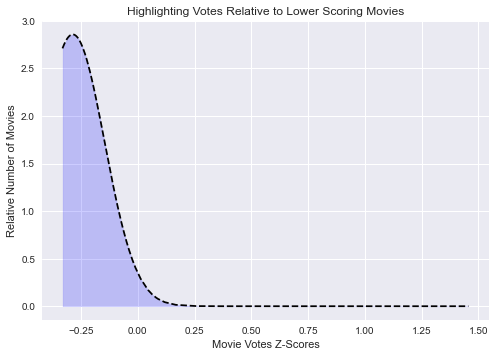

In [27]:
# To generate an array of x-values

x = np.sort(movies_df.loc[movies_df["z_rating"] < -1, 'z_votes'].to_numpy())
# To generate an array of 
# y-values using corresponding x-values
y = pdf(x)
  
# To fill in values under the bell-curve
x_fill = np.sort(movies_df.loc[movies_df["z_rating"] < -1, 'z_votes'].to_numpy())
y_fill = pdf(x_fill)

fig, ax = plt.subplots() 

# Plotting the bell-shaped curve
#plt.figure(figsize = (6, 6))
plt.plot(x, y, color = 'black',
         linestyle = 'dashed')

plt.fill_between(x_fill, y_fill, 0,
                 alpha = 0.2, color = 'blue')

ax.set_xlabel("Movie Votes Z-Scores")
ax.set_ylabel("Relative Number of Movies")
ax.set_title("Highlighting Votes Relative to Lower Scoring Movies")

plt.show()

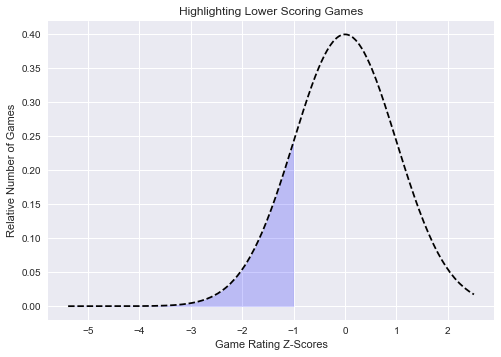

In [28]:
# To generate an array of x-values

x = np.sort(pd.Series(games_df["z_rating"]).to_numpy())
# To generate an array of 
# y-values using corresponding x-values
y = pdf(x)
  
# To fill in values under the bell-curve
x_fill = np.sort(pd.Series(games_df["z_rating"]).to_numpy())
y_fill = pdf(x_fill)


fig, ax = plt.subplots() 
# Plotting the bell-shaped curve

#ax.figure(figsize = (6, 6))
ax.plot(x, y, color = 'black',
         linestyle = 'dashed')

plt.fill_between(x_fill, y_fill, where = (x < -1), alpha = 0.2, color = 'blue')

ax.set_xlabel("Game Rating Z-Scores")
ax.set_ylabel("Relative Number of Games")
ax.set_title("Highlighting Lower Scoring Games")

#fig.savefig('../../z_rating_games.png', format='png', dpi=300)
plt.show()

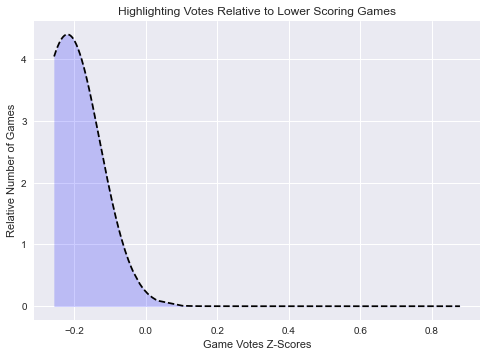

In [30]:
# To generate an array of x-values

x = np.sort(games_df.loc[games_df["z_rating"] < -1, 'z_votes'].to_numpy())
# To generate an array of 
# y-values using corresponding x-values
y = pdf(x)
  
# To fill in values under the bell-curve
x_fill = np.sort(games_df.loc[games_df["z_rating"] < -1, 'z_votes'].to_numpy())
y_fill = pdf(x_fill)

fig, ax = plt.subplots() 

# Plotting the bell-shaped curve
#plt.figure(figsize = (6, 6))
plt.plot(x, y, color = 'black',
         linestyle = 'dashed')

plt.fill_between(x_fill, y_fill, 0,
                 alpha = 0.2, color = 'blue')

ax.set_xlabel("Game Votes Z-Scores")
ax.set_ylabel("Relative Number of Games")
ax.set_title("Highlighting Votes Relative to Lower Scoring Games")

plt.show()

3. Popularity as franchises progress\
again measured how?

look at using rating_diff to see if there is a cut off point for a franchise. \
ie. is the last one in the franchise last because of its poor rating?\
Long franchises should be able to recover whereas shorter franchises may succumb to a poor rating diff

In [124]:
movies_df["rating_diff"].describe()

count    3221.000000
mean       -0.213217
std         0.957457
min        -4.900000
25%        -0.700000
50%        -0.200000
75%         0.200000
max         5.400000
Name: rating_diff, dtype: float64

In [125]:
games_df["rating_diff"].describe()

count    6148.000000
mean       -0.066070
std         1.176112
min        -6.700000
25%        -0.700000
50%        -0.050000
75%         0.580000
max         6.000000
Name: rating_diff, dtype: float64

In [138]:
games_df["year_diff"].describe()

count    6148.000000
mean        2.748373
std         3.316103
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        40.000000
Name: year_diff, dtype: float64

In [144]:
games_df[(games_df["rating_diff"] > 3)]["year_diff"].value_counts()

1.0     28
2.0     12
3.0      9
4.0      8
5.0      6
7.0      4
13.0     3
9.0      3
8.0      2
11.0     1
20.0     1
14.0     1
12.0     1
6.0      1
Name: year_diff, dtype: int64

4. Compare across genres?

5. Compare ratings against standalone/non-franchised content

6. Z-scores broken down by franchise length

7. Frequency of release column = total number of content / number of years from first to last release

In [ ]:
df[(df["content_per_year"] > 1)&(df["franchise_count"] < 5) & (df["type"] == "movie")]["franchise_name"].unique()
df[(df["franchise_name"] =="Tom and Jerry")& (df["type"] == "movie")]
df["frequency"] = df.groupby("franchise_id")[].mean()

8. Look at nostalgia. Is there a better reception for content after a wait?

Find by looking at year diff > 10 and rating compared to what came before

In [32]:
df[df["rating_diff"] < -4]

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes
412,Crash Bandicoot,3025-116,game,tt14220810,Crash Boom Bang!,2006,0,NaN,"[""['Minigame Collection'"", "" 'Action']"", "" 'Ad...",17.0,2.90,20.0,1.0,1.0,-691.0,-4.40,0.0,-3.901370,-0.251950
922,Valkyria Chronicles,3025-1405,game,tt6073360,Valkyria Revolution,2017,0,NaN,"["" 'Fantasy']"", "" 'Action'"", "" 'Role-Playing'""...",26.0,5.10,5.0,1.0,6.0,-69.0,-4.10,0.0,-1.858024,-0.248134
1017,Diablo,3025-148,game,tt9297010,Diablo Immortal,2022,0,NaN,"["" 'Fantasy']"", "" 'Action'"", "" 'Role-Playing'""...",222.0,2.90,8.0,1.0,1.0,137.0,-5.20,0.0,-3.901370,-0.165022
1251,Dragon Ball Z,3025-159,game,tt5724854,Dragon Ball Z for Kinect,2012,0,NaN,"["" 'Fantasy']"", "" 'Action'"", ""['Adventure'"", ""...",34.0,2.60,37.0,1.0,1.0,-16.0,-4.20,-1.0,-4.180008,-0.244742
1795,The Wizard of Oz,3025-1866,game,tt2887448,The Wizard of Oz,1993,0,NaN,"["" 'Fantasy']"", ""['Adventure'""]",37.0,2.50,3.0,1.0,8.0,29.0,-4.50,0.0,-4.272887,-0.243469
1849,Super Mario Bros.,3025-1899,game,tt3417424,Super Mario Bros. & Friends: When I Grow Up,1992,0,NaN,"["" 'Educational']"", "" 'Family'"", "" 'Comedy'"", ...",10.0,5.10,18.0,1.0,2.0,-5080.0,-4.10,0.0,-1.858024,-0.254918
2379,Sega Vintage Collection,3025-2297,game,"tt0778849, tt2371447","Sonic the Hedgehog, Sonic the Hedgehog Genesis",2006,0,NaN,"["" 'Educational']"", "" 'Family'"", ""['Adventure'...",673.5,3.35,18.0,2.0,11.0,273.5,-4.15,1.0,-3.483413,0.026432
3102,Sonic Riders,3025-2892,game,tt1740027,Sonic Free Riders,2010,0,NaN,"["" 'Family']"", "" 'Action'"", ""['Driving/Racing'...",266.0,1.80,3.0,1.0,2.0,34.0,-4.10,0.0,-4.923042,-0.146364
3310,Arcade Archives,3025-3081,game,tt0906595,Golf,1995,0,NaN,"[""['Golf'"", "" 'Sport'"", "" 'Sports']""]",12.0,3.00,172.0,1.0,1.0,-173.0,-4.60,0.0,-3.808490,-0.254070
3425,Animal Crossing,3025-32,game,"tt4917440, tt6087618","Animal Crossing: Happy Home Designer, Animal C...",2015,0,NaN,"["" 'Family'"", "" 'Fantasy']"", ""['Simulation'"", ...",397.0,2.35,8.0,2.0,3.0,-714.0,-5.25,1.0,-4.412206,-0.090815


<AxesSubplot:title={'center':'z_rating'}, xlabel='franchise_count'>

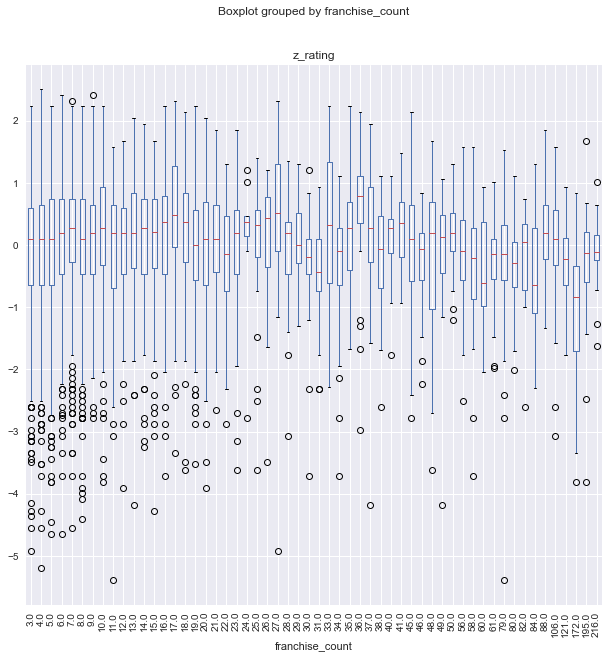

In [119]:
games_df.boxplot(by = "franchise_count", column = ["z_rating"], rot = 90, figsize=(10,10))

<AxesSubplot:title={'center':'z_rating'}, xlabel='franchise_count'>

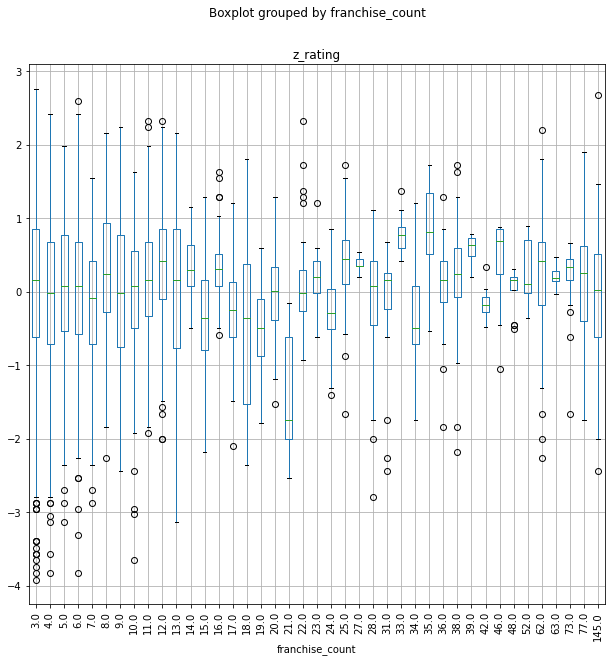

In [22]:
movies_df.boxplot(by = "franchise_count", column = ["z_rating"], rot = 90, figsize=(10,10))

for any row where z_rating < 0, graph coinciding z-votes (scatter?)

In [46]:
movies_df["startYear"] = pd.to_numeric(movies_df["year"], errors="coerce")

C:\Users\35387\AppData\Local\Temp\ipykernel_56456\142991057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["startYear"] = pd.to_numeric(movies_df["year"], errors="coerce")


<AxesSubplot:xlabel='year'>

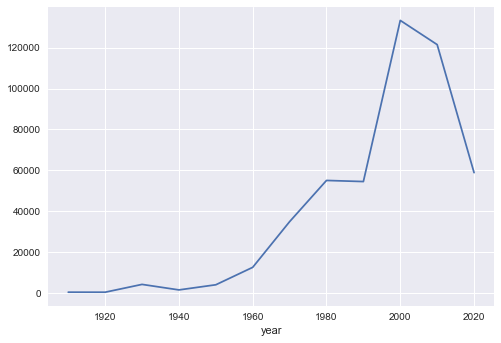

In [49]:
movies_df["votes_average"].groupby(movies_df["year"]//10*10).mean().plot()

<AxesSubplot:xlabel='year'>

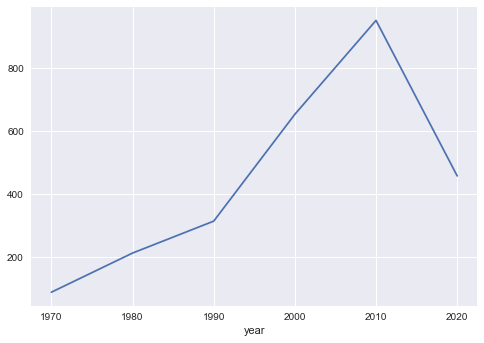

In [50]:
games_df["votes_average"].groupby(games_df["year"]//10*10).mean().plot()

In [ ]:
movies_df["averageRating"].groupby(movies_df["startYear"]).mean().plot(ylim = (0,10))

In [ ]:
movies_df["averageRating"].groupby(movies_df["startYear"]//10*10).mean().plot(ylim = (0,10))

In [ ]:
movies_df["averageRating"].groupby(movies_df["startYear"]//10*10).mean().plot()

In [ ]:
movies_df["franchise_id"].value_counts().plot.hist()

In [ ]:
dict(movies_df["startYear"].value_counts())

In [ ]:
sorted(movies_df["startYear"].unique())

In [ ]:
 # Note: minimum_franchise_value is set at the top of the notebook
franchise_counts = giantbomb_games.groupby('franchise_id').size()
franchise_dict = {k:v for k,v in franchise_counts.items() if v < minimum_franchise_value}
franchise_ids_to_drop = list(franchise_dict.keys())

mask = giantbomb_games['franchise_id'].isin(franchise_ids_to_drop)
giantbomb_games = giantbomb_games.drop(index=giantbomb_games[mask].index)

In [ ]:
games_df['genres'] = games_df["genres"].apply(lambda row: ast.literal_eval(row) if pd.notna(row) else np.nan)

In [ ]:
movies_df["genres"] = movies_df["genres"].apply(lambda x: x.split(","))

In [ ]:
genre_list = df["genres"].explode().unique()
genre_list